#### **MiniProject 7 - Open Crime UK**

Part I
Questions

1)Top 10 Type by # events. Type column is the event (see sample data in the end of this document ).
  Output:
  type, num_events, rank

2)Top 10 Ethnics by # events. Use column “Officer-defined ethnicity”
  Output:
  type, office_num_events, office_ethnic_rank

3)Top 10 Ethnics by # events. Use column “Self-defined ethnicity”
  Output:
  type, self_num_events, self_ethnic_rank

4)Merge 2 and 3 above on type.
  Output:
  type, office_num_events, office_ethnic_rank, self_num_events, self_ethnic_rank

5)Top 10 Type by Gender = Male.
  Output:
  type, num_events_men, rank_men

6)Top 10 Type by Gender = Female.
  Output:
  type, num_events_men, rank_women

7)Group bar chart plot (vertical) with output from 5 and 6.
[1][2]
Bar 1 -> Male
Bar 2 -> Female

8)For Gender = Male, # events by “Age range”
  Output:
  type, age_range_male, num_events_male, rank_male

9)For Gender = Female, # events by “Age range”
  Output:
  type, age_range_female, num_events_female, rank_female

10)Merge 8 and 9 on column “type”
  Output:
  type, age_range_male, num_events_male, rank_male, age_range_female, num_events_female, rank_female



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [6]:
from google.colab import files
uploaded = files.upload()

Saving 2019-07-20250203T114519Z-001.zip to 2019-07-20250203T114519Z-001.zip


In [21]:
import pandas as pd
import glob
import os

def read_csv_files_in_folder(folder_path):
    all_dataframes = []
    for filename in glob.glob(os.path.join(folder_path, '*.csv')):
        try:
            df = pd.read_csv(filename)
            all_dataframes.append(df)
        except pd.errors.ParserError:
            print(f"Error reading file: {filename}. Skipping.")
        except Exception as e:  # Catch other potential errors
            print(f"An unexpected error occurred while reading {filename}: {e}")

    if all_dataframes:
        return pd.concat(all_dataframes, ignore_index=True)
    else:
        return None

extracted_folder_path = '/content/temp_extracted_files/2019-07' # Update this to the actual path

combined_df = read_csv_files_in_folder(extracted_folder_path)

if combined_df is not None:
    print(combined_df.head())
else:
    print("No CSV files found or errors occurred during reading.")


            Type                       Date Part of a policing operation  \
0  Person search  2019-06-30T23:10:00+00:00                        False   
1  Person search  2019-06-30T23:12:00+00:00                        False   
2  Person search  2019-06-30T23:12:00+00:00                        False   
3  Person search  2019-06-30T23:50:00+00:00                        False   
4  Person search  2019-07-01T00:42:00+00:00                        False   

   Policing operation   Latitude  Longitude Gender Age range  \
0                 NaN        NaN        NaN   Male   over 34   
1                 NaN        NaN        NaN   Male     18-24   
2                 NaN        NaN        NaN   Male     18-24   
3                 NaN        NaN        NaN   Male     18-24   
4                 NaN  51.791131  -0.671176   Male     18-24   

                              Self-defined ethnicity  \
0  White - English/Welsh/Scottish/Northern Irish/...   
1                                             

**1)Top 10 Type by # events. Type column is the event (see sample data in the end of this document ).**
Output:
type, num_events, rank


In [27]:
if combined_df is not None:
    type_counts = combined_df['Type'].value_counts().reset_index()
    type_counts.columns = ['type', 'num_events']
    type_counts['rank'] = type_counts['num_events'].rank(ascending=False, method='dense')
    top_3_types = type_counts.head(3)
    print(tabulate(top_3_types, headers='keys', tablefmt='psql'))
else:
    print("DataFrame 'combined_df' is not properly loaded. Please check file paths and data.")


+----+---------------------------+--------------+--------+
|    | type                      |   num_events |   rank |
|----+---------------------------+--------------+--------|
|  0 | Person search             |        17275 |      1 |
|  1 | Person and Vehicle search |         4555 |      2 |
|  2 | Vehicle search            |          596 |      3 |
+----+---------------------------+--------------+--------+


**2) Top 10 Ethnics by # events. Use column “Officer-defined ethnicity”**
Output:
type, office_num_events, office_ethnic_rank


In [43]:
if combined_df is not None:
    ethnicity_counts = combined_df.groupby(['Type', 'Officer-defined ethnicity']).size().reset_index(name='office_num_events')
    ethnicity_counts['office_ethnic_rank'] = ethnicity_counts.groupby('Type')['office_num_events'].rank(ascending=False, method='dense')
    top_10_ethnicities = ethnicity_counts.sort_values(by=['Type', 'office_ethnic_rank']).groupby('Type').head(10)
    print(tabulate(top_10_ethnicities, headers='keys', tablefmt='psql'))
else:
    print("DataFrame 'combined_df' is not properly loaded. Please check file paths and data.")


+----+---------------------------+-----------------------------+---------------------+----------------------+
|    | Type                      | Officer-defined ethnicity   |   office_num_events |   office_ethnic_rank |
|----+---------------------------+-----------------------------+---------------------+----------------------|
|  5 | Person and Vehicle search | White                       |                2970 |                    1 |
|  0 | Person and Vehicle search | Asian                       |                 663 |                    2 |
|  1 | Person and Vehicle search | Black                       |                 494 |                    3 |
|  4 | Person and Vehicle search | Unknown                     |                 300 |                    4 |
|  3 | Person and Vehicle search | Other                       |                  93 |                    5 |
|  2 | Person and Vehicle search | Mixed                       |                  35 |                    6 |
| 11 | Per

**3) Top 10 Ethnics by # events. Use column “Officer-defined ethnicity”**
Output:
type, office_num_events, office_ethnic_rank


In [45]:
if combined_df is not None:
    ethnicity_counts = combined_df.groupby(['Type', 'Self-defined ethnicity']).size().reset_index(name='self_num_events')
    ethnicity_counts['self_ethnic_rank'] = ethnicity_counts.groupby('Type')['self_num_events'].rank(ascending=False, method='dense')
    top_10_ethnicities = ethnicity_counts.sort_values(by=['Type', 'self_ethnic_rank']).groupby('Type').head(10)
    print(tabulate(top_10_ethnicities, headers='keys', tablefmt='psql'))
else:
    print("DataFrame 'combined_df' is not properly loaded. Please check file paths and data.")


+----+---------------------------+--------------------------------------------------------------------------------------+-------------------+--------------------+
|    | Type                      | Self-defined ethnicity                                                               |   self_num_events |   self_ethnic_rank |
|----+---------------------------+--------------------------------------------------------------------------------------+-------------------+--------------------|
| 15 | Person and Vehicle search | White - English/Welsh/Scottish/Northern Irish/British                                |              2580 |                  1 |
| 13 | Person and Vehicle search | Other ethnic group - Not stated                                                      |               487 |                  2 |
|  4 | Person and Vehicle search | Asian/Asian British - Pakistani                                                      |               347 |                  3 |
| 14 | Person and Vehi

**4) Merge 2 and 3 above on type.**
Output:
type, office_num_events, office_ethnic_rank, self_num_events, self_ethnic_rank


In [49]:
# prompt: Merge 2 and 3 above on type.
# Output:
# type, office_num_events, office_ethnic_rank, self_num_events, self_ethnic_rank
# only 10

# Merge the results of steps 2 and 3
if combined_df is not None:
    # Step 2 results (Officer-defined ethnicity)
    office_ethnicity_counts = combined_df.groupby(['Type', 'Officer-defined ethnicity']).size().reset_index(name='office_num_events')
    office_ethnicity_counts['office_ethnic_rank'] = office_ethnicity_counts.groupby('Type')['office_num_events'].rank(ascending=False, method='dense')
    office_ethnicity_counts = office_ethnicity_counts.sort_values(by=['Type', 'office_ethnic_rank']).groupby('Type').head(10)

    # Step 3 results (Self-defined ethnicity)
    self_ethnicity_counts = combined_df.groupby(['Type', 'Self-defined ethnicity']).size().reset_index(name='self_num_events')
    self_ethnicity_counts['self_ethnic_rank'] = self_ethnicity_counts.groupby('Type')['self_num_events'].rank(ascending=False, method='dense')
    self_ethnicity_counts = self_ethnicity_counts.sort_values(by=['Type', 'self_ethnic_rank']).groupby('Type').head(10)

    # Merge the dataframes
    merged_df = pd.merge(office_ethnicity_counts, self_ethnicity_counts, on='Type', how='outer')

    # Keep only the top 10 based on office_ethnic_rank
    merged_df = merged_df.sort_values(by=['Type', 'office_ethnic_rank']).groupby('Type').head(5)

    print(tabulate(merged_df, headers='keys', tablefmt='psql'))
else:
    print("DataFrame 'combined_df' is not properly loaded. Please check file paths and data.")


+-----+---------------------------+-----------------------------+---------------------+----------------------+-------------------------------------------------------+-------------------+--------------------+
|     | Type                      | Officer-defined ethnicity   |   office_num_events |   office_ethnic_rank | Self-defined ethnicity                                |   self_num_events |   self_ethnic_rank |
|-----+---------------------------+-----------------------------+---------------------+----------------------+-------------------------------------------------------+-------------------+--------------------|
|   0 | Person and Vehicle search | White                       |                2970 |                    1 | White - English/Welsh/Scottish/Northern Irish/British |              2580 |                  1 |
|   1 | Person and Vehicle search | White                       |                2970 |                    1 | Other ethnic group - Not stated                       |  

**5) Top 10 Type by Gender = Male.**
Output:
type, num_events_men, rank_men


In [50]:
if combined_df is not None:
    male_events = combined_df[combined_df['Gender'] == 'Male']
    type_counts_men = male_events['Type'].value_counts().reset_index()
    type_counts_men.columns = ['type', 'num_events_men']
    type_counts_men['rank_men'] = type_counts_men['num_events_men'].rank(ascending=False, method='dense')
    top_10_types_men = type_counts_men.head(10)
    print(tabulate(top_10_types_men, headers='keys', tablefmt='psql'))
else:
    print("DataFrame 'combined_df' is not properly loaded. Please check file paths and data.")


+----+---------------------------+------------------+------------+
|    | type                      |   num_events_men |   rank_men |
|----+---------------------------+------------------+------------|
|  0 | Person search             |            13714 |          1 |
|  1 | Person and Vehicle search |             3855 |          2 |
|  2 | Vehicle search            |               11 |          3 |
+----+---------------------------+------------------+------------+


**6) Top 10 Type by Gender = Female.**
Output:
type, num_events_men, rank_women


In [51]:
if combined_df is not None:
    female_events = combined_df[combined_df['Gender'] == 'Female']
    type_counts_women = female_events['Type'].value_counts().reset_index()
    type_counts_women.columns = ['type', 'num_events_women']
    type_counts_women['rank_women'] = type_counts_women['num_events_women'].rank(ascending=False, method='dense')
    top_10_types_women = type_counts_women.head(10)
    print(tabulate(top_10_types_women, headers='keys', tablefmt='psql'))
else:
    print("DataFrame 'combined_df' is not properly loaded. Please check file paths and data.")


+----+---------------------------+--------------------+--------------+
|    | type                      |   num_events_women |   rank_women |
|----+---------------------------+--------------------+--------------|
|  0 | Person search             |               1619 |            1 |
|  1 | Person and Vehicle search |                362 |            2 |
|  2 | Vehicle search            |                  4 |            3 |
+----+---------------------------+--------------------+--------------+


**7) Group bar chart plot (vertical) with output from 5 and 6.**
[1][2]
Bar 1 -> Male
Bar 2 -> Female


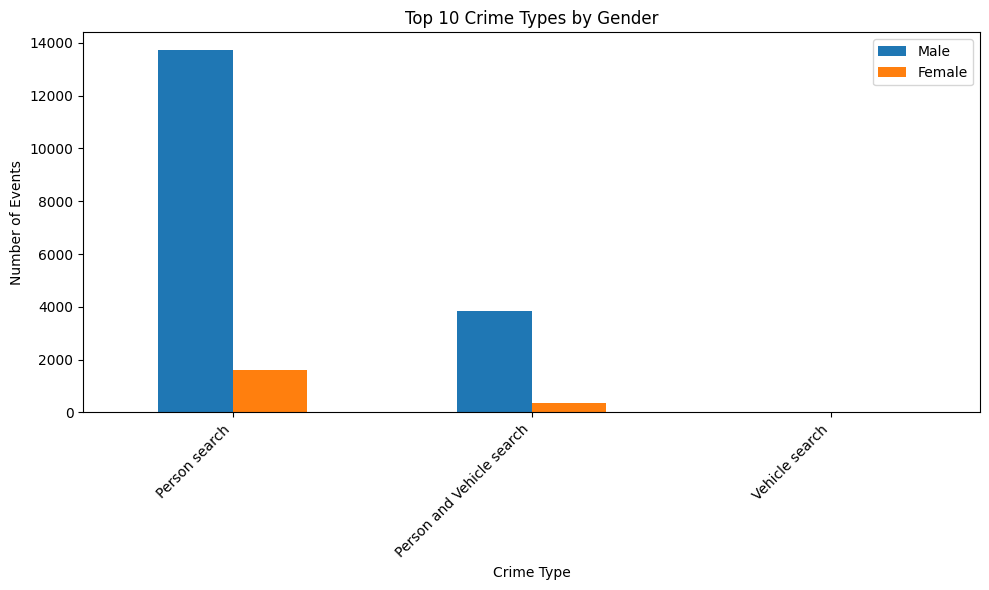

In [52]:
import matplotlib.pyplot as plt

if combined_df is not None:
    # Assuming top_10_types_men and top_10_types_women are already defined from previous code blocks
    try:
        # Prepare data for plotting
        men_data = top_10_types_men.set_index('type')['num_events_men']
        women_data = top_10_types_women.set_index('type')['num_events_women']

        # Combine data, handling potential mismatches in crime types
        combined_plot_data = pd.concat([men_data, women_data], axis=1).fillna(0)  # Fill NaN with 0

        # Create the grouped bar chart
        combined_plot_data.plot(kind='bar', figsize=(10, 6))  # Adjust figure size as needed
        plt.title('Top 10 Crime Types by Gender')
        plt.xlabel('Crime Type')
        plt.ylabel('Number of Events')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
        plt.legend(['Male', 'Female'])
        plt.tight_layout() # Adjust layout to prevent labels from overlapping
        plt.show()
    except NameError:
        print("top_10_types_men or top_10_types_women not defined.  Run the code blocks that create these variables first.")
    except Exception as e:
        print(f"An error occurred during plotting: {e}")
else:
    print("DataFrame 'combined_df' is not properly loaded. Please check file paths and data.")


**8) For Gender = Male, # events by “Age range”**
Output:
type, age_range_male, num_events_male, rank_male


In [53]:
if combined_df is not None:
    male_events = combined_df[combined_df['Gender'] == 'Male']
    age_range_counts = male_events.groupby(['Type', 'Age range']).size().reset_index(name='num_events_male')
    age_range_counts['rank_male'] = age_range_counts.groupby('Type')['num_events_male'].rank(ascending=False, method='dense')
    print(tabulate(age_range_counts, headers='keys', tablefmt='psql'))
else:
    print("DataFrame 'combined_df' is not properly loaded. Please check file paths and data.")


+----+---------------------------+-------------+-------------------+-------------+
|    | Type                      | Age range   |   num_events_male |   rank_male |
|----+---------------------------+-------------+-------------------+-------------|
|  0 | Person and Vehicle search | 10-17       |               395 |           4 |
|  1 | Person and Vehicle search | 18-24       |              1468 |           1 |
|  2 | Person and Vehicle search | 25-34       |              1050 |           2 |
|  3 | Person and Vehicle search | over 34     |               786 |           3 |
|  4 | Person and Vehicle search | under 10    |                 5 |           5 |
|  5 | Person search             | 10-17       |              3023 |           2 |
|  6 | Person search             | 18-24       |              3905 |           1 |
|  7 | Person search             | 25-34       |              2655 |           4 |
|  8 | Person search             | over 34     |              2941 |           3 |
|  9

**9) For Gender = Female, # events by “Age range”**
Output:
type, age_range_female, num_events_female, rank_female


In [54]:
if combined_df is not None:
    female_events = combined_df[combined_df['Gender'] == 'Female']
    age_range_counts_female = female_events.groupby(['Type', 'Age range']).size().reset_index(name='num_events_female')
    age_range_counts_female['rank_female'] = age_range_counts_female.groupby('Type')['num_events_female'].rank(ascending=False, method='dense')
    print(tabulate(age_range_counts_female, headers='keys', tablefmt='psql'))
else:
    print("DataFrame 'combined_df' is not properly loaded. Please check file paths and data.")


+----+---------------------------+-------------+---------------------+---------------+
|    | Type                      | Age range   |   num_events_female |   rank_female |
|----+---------------------------+-------------+---------------------+---------------|
|  0 | Person and Vehicle search | 10-17       |                  43 |             4 |
|  1 | Person and Vehicle search | 18-24       |                 111 |             1 |
|  2 | Person and Vehicle search | 25-34       |                 100 |             2 |
|  3 | Person and Vehicle search | over 34     |                  92 |             3 |
|  4 | Person search             | 10-17       |                 324 |             4 |
|  5 | Person search             | 18-24       |                 339 |             3 |
|  6 | Person search             | 25-34       |                 378 |             2 |
|  7 | Person search             | over 34     |                 427 |             1 |
|  8 | Vehicle search            | 25-34   

**10)Merge 8 and 9 on column “type”**
Output
type, age_range_male, num_events_male, rank_male, age_range_female, num_events_female, rank_female


In [57]:
if combined_df is not None:

    try:
        merged_age_range = pd.merge(age_range_counts, age_range_counts_female, on='Type', how='outer', suffixes=('_male', '_female'))
        print(tabulate(merged_age_range.head(10), headers='keys', tablefmt='psql'))
    except NameError:
        print("age_range_counts or age_range_counts_female not defined. Run the code blocks that create these variables first.")
    except Exception as e:
        print(f"An error occurred during the merge: {e}")
else:
    print("DataFrame 'combined_df' is not properly loaded. Please check file paths and data.")


+----+---------------------------+------------------+-------------------+-------------+--------------------+---------------------+---------------+
|    | Type                      | Age range_male   |   num_events_male |   rank_male | Age range_female   |   num_events_female |   rank_female |
|----+---------------------------+------------------+-------------------+-------------+--------------------+---------------------+---------------|
|  0 | Person and Vehicle search | 10-17            |               395 |           4 | 10-17              |                  43 |             4 |
|  1 | Person and Vehicle search | 10-17            |               395 |           4 | 18-24              |                 111 |             1 |
|  2 | Person and Vehicle search | 10-17            |               395 |           4 | 25-34              |                 100 |             2 |
|  3 | Person and Vehicle search | 10-17            |               395 |           4 | over 34            |          